In [6]:
!pip install pandas

import pandas as pd

In [7]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Carregar o dataset
dataset = pd.read_csv("C:/Users/User/Desktop/AASE/datasets/apartments_for_rent_classified_10K.csv", encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

# Exibir as primeiras linhas
print(dataset.head())

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [16]:
# Exibir os nomes das colunas 
print(dataset.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [17]:
# Selecionar colunas numéricas para análise de correlação
numeric_columns = dataset[['price', 'square_feet', 'bathrooms', 'bedrooms']].copy()

# Converter 'price' e 'square_feet' para numérico (removendo símbolos, caso existam)
numeric_columns['price'] = pd.to_numeric(numeric_columns['price'], errors='coerce')
numeric_columns['square_feet'] = pd.to_numeric(numeric_columns['square_feet'], errors='coerce')

# Remover entradas com valores ausentes nas colunas numéricas
numeric_columns = numeric_columns.dropna()

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Exibir a matriz de correlação
print(correlation_matrix)


                price  square_feet  bathrooms  bedrooms
price        1.000000     0.429748   0.373869  0.271428
square_feet  0.429748     1.000000   0.769734  0.725960
bathrooms    0.373869     0.769734   1.000000  0.683551
bedrooms     0.271428     0.725960   0.683551  1.000000


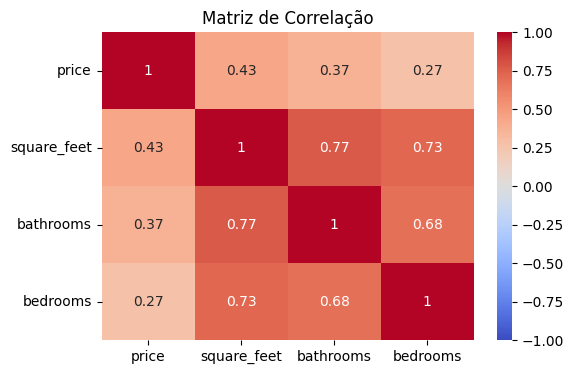

In [22]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(6, 4))

# Criar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


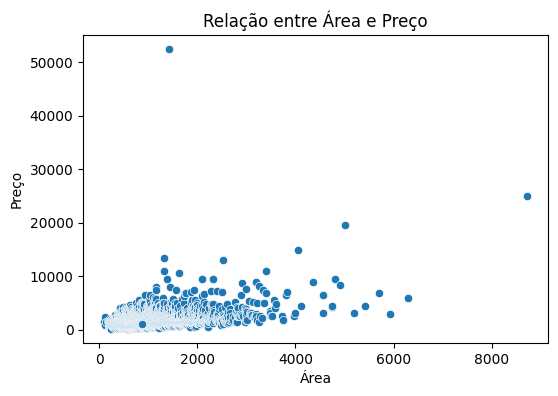

In [23]:
# Gráfico de dispersão entre preço e área
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='square_feet', y='price')
plt.title('Relação entre Área e Preço')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.show()


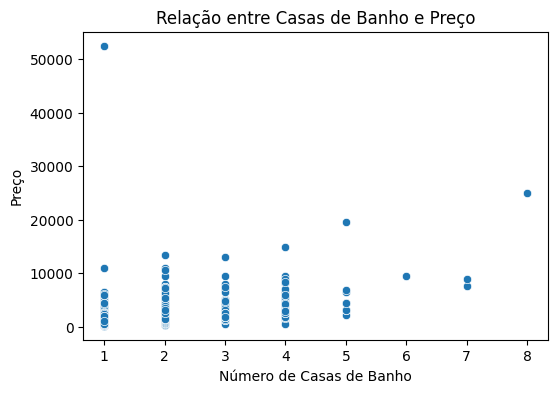

In [24]:
# Gráfico de dispersão entre preço e casas de banho
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='bathrooms', y='price')
plt.title('Relação entre Casas de Banho e Preço')
plt.xlabel('Número de Casas de Banho')
plt.ylabel('Preço')
plt.show()

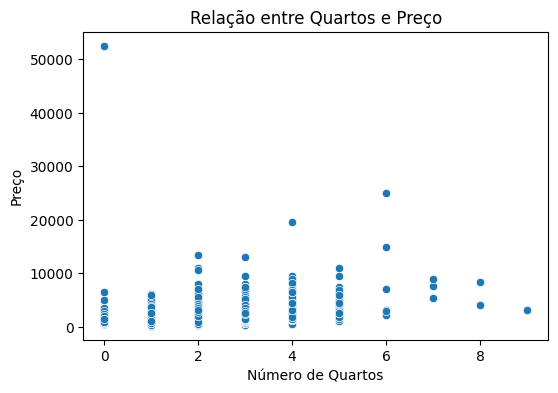

In [25]:
# Gráfico de dispersão entre preço e quartos
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='bedrooms', y='price')
plt.title('Relação entre Quartos e Preço')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.show()

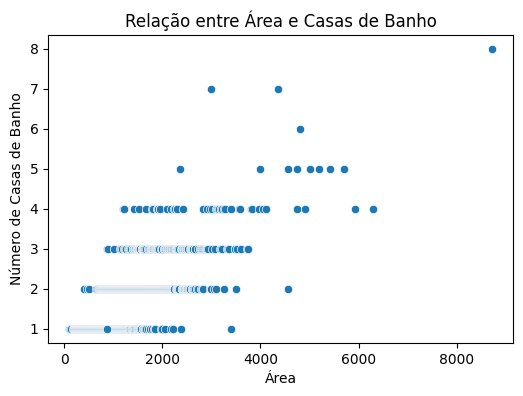

In [26]:
# Gráfico de dispersão entre tamanho e casas de banho
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='square_feet', y='bathrooms')
plt.title('Relação entre Área e Casas de Banho')
plt.xlabel('Área')
plt.ylabel('Número de Casas de Banho')
plt.show()

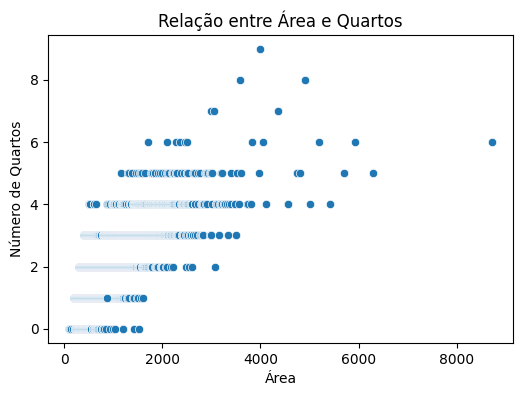

In [27]:
# Gráfico de dispersão entre tamanho e quartos
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='square_feet', y='bedrooms')
plt.title('Relação entre Área e Quartos')
plt.xlabel('Área')
plt.ylabel('Número de Quartos')
plt.show()

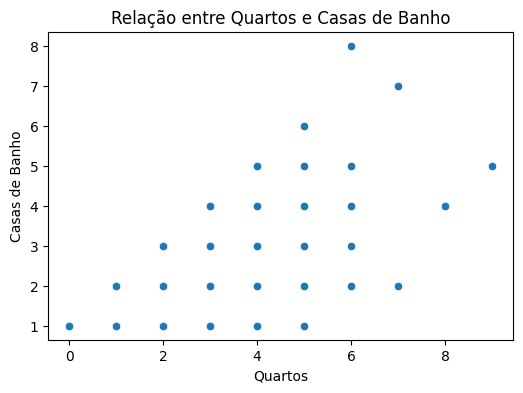

In [20]:
# Gráfico de dispersão entre quartos e casas de banho
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_columns, x='bedrooms', y='bathrooms')
plt.title('Relação entre Quartos e Casas de Banho')
plt.xlabel('Quartos')
plt.ylabel('Casas de Banho')
plt.show()

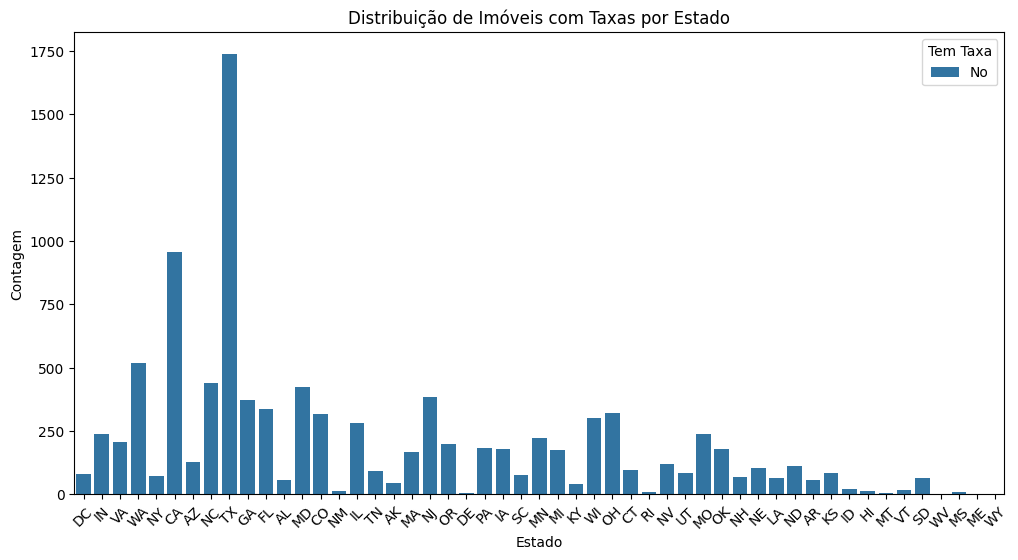

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='fee', data=dataset)
plt.title('Distribuição de Imóveis com Taxas por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Tem Taxa')
plt.show()
